# Explore here

It's recommended to use this notebook for exploration purposes.

For example: 

1. You could import the CSV generated by python into your notebook and explore it.
2. You could connect to your database using `pandas.read_sql` from this notebook and explore it.

In [47]:
### ejecutar en consola
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install folium

In [2]:
# importo librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datautils.analysis import *
import folium 
from folium.plugins import MarkerCluster

In [3]:
# cargo datos desde la web
df_airbnb = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv')

In [4]:
# describo el data frame
df_airbnb.info()

# el data frame contiene 16 columnas y 48895 filas
# las columnas que contienen NA son: name, host_name, last_review y reviews_per_month

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
# miro aleatoriamente 5 filas para entender el data set
df_airbnb.sample(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
26869,21305248,Newly Renovated 1 Bedroom Apartment Hell's Kit...,1710317,Elgin,Manhattan,Hell's Kitchen,40.76197,-73.98961,Entire home/apt,200,1,107,2019-07-05,5.17,1,200
1424,639199,"Beautiful 4BR/4BA Home, Staten Island, NY City.",1483081,Marina,Staten Island,Tottenville,40.50868,-74.23986,Entire home/apt,299,3,59,2019-07-08,0.82,1,245
28065,21921608,32 FLR VIEWS!LINCOLN SQR-LUXURY 2BR MIDTOWN W ...,76104209,Rated,Manhattan,Upper West Side,40.76996,-73.98551,Entire home/apt,375,30,0,NaN,NaN,33,300


In [6]:
### edito los tipos de variables

# variables a pasar a categorical: name, host_name, neighbourhood_group, neighbourhood, room_type
df_airbnb['name'] = pd.Categorical(df_airbnb['name'])
df_airbnb['host_name'] = pd.Categorical(df_airbnb['host_name'])
df_airbnb['neighbourhood_group'] = pd.Categorical(df_airbnb['neighbourhood_group'])
df_airbnb['neighbourhood'] = pd.Categorical(df_airbnb['neighbourhood'])
df_airbnb['room_type'] = pd.Categorical(df_airbnb['room_type'])

# variables a pasar a fecha: last_review
df_airbnb['last_review'] = pd.to_datetime(df_airbnb['last_review'])

# el resto deben ser numéricas

In [7]:
# vuelvo a mirar los datos a ver si se ven igual
df_airbnb.sample(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
36732,29189777,"Bed&Bushwick | Clean & Chic Apt, Close to Subway",219924114,Mella & Justin,Brooklyn,Bushwick,40.69540,-73.92723,Entire home/apt,115,3,38,2019-07-01,4.40,1,131
25536,20435714,Pretty studio with lots of light,48677247,Elle,Bronx,Norwood,40.88304,-73.88278,Entire home/apt,58,5,1,2017-09-05,0.04,1,0
35719,28345804,LES Light Filled Large Bedroom,86274028,Francesca,Manhattan,East Village,40.72803,-73.97961,Private room,100,1,1,2018-09-18,0.10,1,0


In [8]:
# vuelvo a ver los tipos de variables
df_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              48895 non-null  int64         
 1   name                            48879 non-null  category      
 2   host_id                         48895 non-null  int64         
 3   host_name                       48874 non-null  category      
 4   neighbourhood_group             48895 non-null  category      
 5   neighbourhood                   48895 non-null  category      
 6   latitude                        48895 non-null  float64       
 7   longitude                       48895 non-null  float64       
 8   room_type                       48895 non-null  category      
 9   price                           48895 non-null  int64         
 10  minimum_nights                  48895 non-null  int64         
 11  nu

In [9]:
# describo variables numéricas (cuantitativas)
df_airbnb.describe()

# cosas que llaman la atención:
# hay datos raros en latitud y longitud (cercanos a cero)
# hay casos con precio = 0

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [10]:
# me fijo si el id se repite
print('la cantidad de id distintos en '+ str(len(df_airbnb)) + ' filas es ' + str(df_airbnb['id'].nunique()))

# el id no se repite, creo que identifica una propiedad distinta

# me fijo si el name se repite
print('la cantidad de name distintos en '+ str(len(df_airbnb)) + ' filas es ' + str(df_airbnb['name'].nunique()))

# el name sí se repite, pero pueden haber varias propiedades con el mismo nombre

#### entiendo que la unidad de análisis es cada propiedad distinta, es decir, cada fila identifica una propiedad, pueden haber varias propiedades con un mismo anfitrión

la cantidad de id distintos en 48895 filas es 48895
la cantidad de name distintos en 48895 filas es 47905


In [11]:
# me fijo en casos con precio 0
print(f'hay {sum(df_airbnb["price"] == 0)} alojamientos con precio 0')

# los elimino del dataset
df_airbnb = df_airbnb[df_airbnb['price'] != 0]

hay 11 alojamientos con precio 0


In [12]:
# algunos datos del data set:
print(f'cantidad de alojamientos distintos: {len(df_airbnb)}')
print('')
print(f'cantidad de nombres de alojamientos distintos: {df_airbnb["name"].nunique()}, es decir se repiten {len(df_airbnb)-df_airbnb["name"].nunique()} nombres de alojamientos')
print('')
print(f'cantidad de anfitriones distintos: {df_airbnb["host_id"].nunique()}')
print('')
print(f'cantidad de nombres de anfitriones distintos: {df_airbnb["host_name"].nunique()}, es decir se repiten {len(df_airbnb)-df_airbnb["host_name"].nunique()} nombres de anfitriones')
print('')
print(f'cantidad de grupos de vecindarios distintos: {df_airbnb["neighbourhood_group"].nunique()}')
print('')
print(f'Estos son los grupos de vecindarios: {df_airbnb["neighbourhood_group"].unique()}')
print('')
print(f'cantidad de vecindarios distintos: {df_airbnb["neighbourhood"].nunique()}')
print('')
print(f'cantidad de tipos de cuartos distintos: {df_airbnb["room_type"].nunique()}')
print('')
print(f'Estos son los tipos de cuartos: {df_airbnb["room_type"].unique()}')
print('')
print(f'Las fechas de las últimas reseñas varían entre {df_airbnb["last_review"].min().date()} y {df_airbnb["last_review"].max().date()}')

cantidad de alojamientos distintos: 48884

cantidad de nombres de alojamientos distintos: 47894, es decir se repiten 990 nombres de alojamientos

cantidad de anfitriones distintos: 37455

cantidad de nombres de anfitriones distintos: 11450, es decir se repiten 37434 nombres de anfitriones

cantidad de grupos de vecindarios distintos: 5

Estos son los grupos de vecindarios: ['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']
Categories (5, object): ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']

cantidad de vecindarios distintos: 221

cantidad de tipos de cuartos distintos: 3

Estos son los tipos de cuartos: ['Private room', 'Entire home/apt', 'Shared room']
Categories (3, object): ['Entire home/apt', 'Private room', 'Shared room']

Las fechas de las últimas reseñas varían entre 2011-03-28 y 2019-07-08


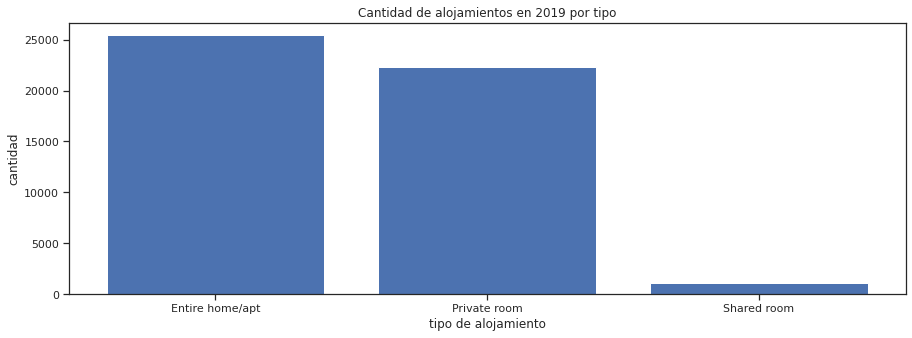

In [13]:
# cantidad de alojamientos por tipo
hist_rooms = df_airbnb['room_type'].value_counts()
hist_rooms = pd.DataFrame({'room_type': hist_rooms.index, 'frecuencia': hist_rooms.values})

fig=plt.figure(figsize=(15,5))
plt.bar(hist_rooms['room_type'].astype(str), hist_rooms['frecuencia'])
plt.title('Cantidad de alojamientos en 2019 por tipo')
plt.xlabel('tipo de alojamiento')
plt.ylabel('cantidad')

plt.show()

## los más frecuentes son apartamento o casa entera, o cuarto privado. El menos frecuente es cuarto compartido

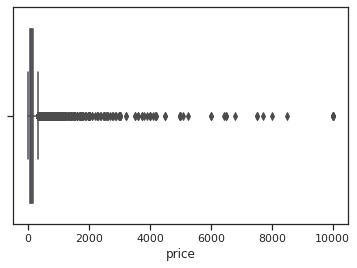

In [22]:
# distribución del precio del alojamiento
sns.boxplot(x = df_airbnb['price'])
plt.show()

## los precios llegan a 10000, máas de 500 aprox ya se considera outlier

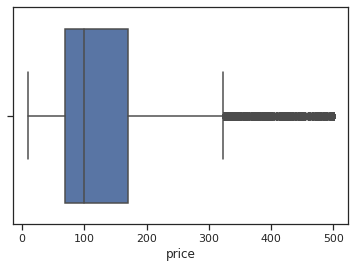

In [21]:
# distribución del precio del alojamiento (menores a 500)
sns.boxplot(x = df_airbnb['price'][df_airbnb['price'] < 500])
plt.show()

## el precio mediano es de aprox 100 dólares por alojamiento y día

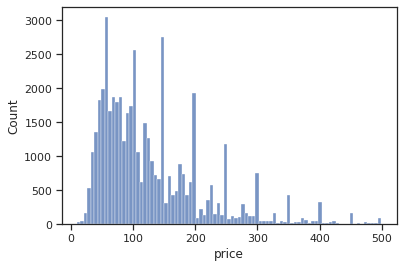

In [52]:
# histograma del precio del alojamiento (precio por noche menor a 500 usd)
sns.histplot(x = df_airbnb['price'][df_airbnb['price'] < 500])
plt.show()

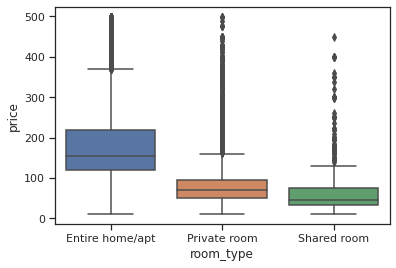

In [23]:
# precio del alojamiento según tipo (menores a 500 usd)
sns.boxplot(x = df_airbnb['room_type'][df_airbnb['price'] < 500], y = df_airbnb['price'][df_airbnb['price'] < 500])
plt.show()

## en general el precio de un alojamiento entero es superior al de una habitación privada, y este es superior al de una habitación compartida
## el precio también depende del vecindario

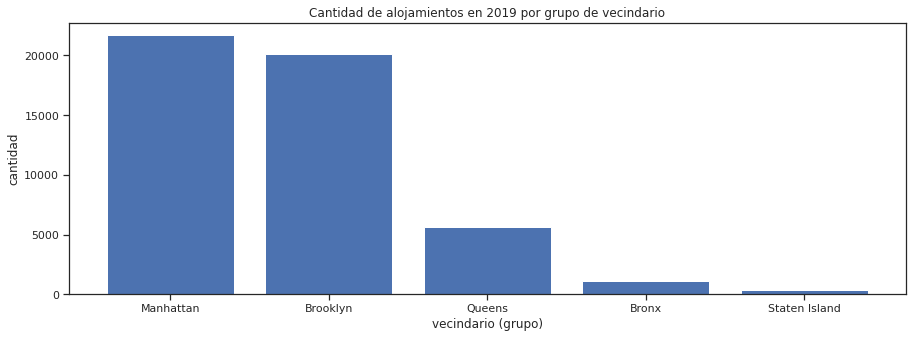

In [48]:
# cantidad de alojamientos por vecindario
bar_vec = df_airbnb['neighbourhood_group'].value_counts()
bar_vec = pd.DataFrame({'vec': bar_vec.index, 'frec': bar_vec.values})

fig=plt.figure(figsize=(15,5))
plt.bar(bar_vec['vec'].astype(str), bar_vec['frec'])
plt.title('Cantidad de alojamientos en 2019 por grupo de vecindario')
plt.xlabel('vecindario (grupo)')
plt.ylabel('cantidad')

plt.show()

# la mayoría de los alojamientos están en Manhattan o Brooklyn

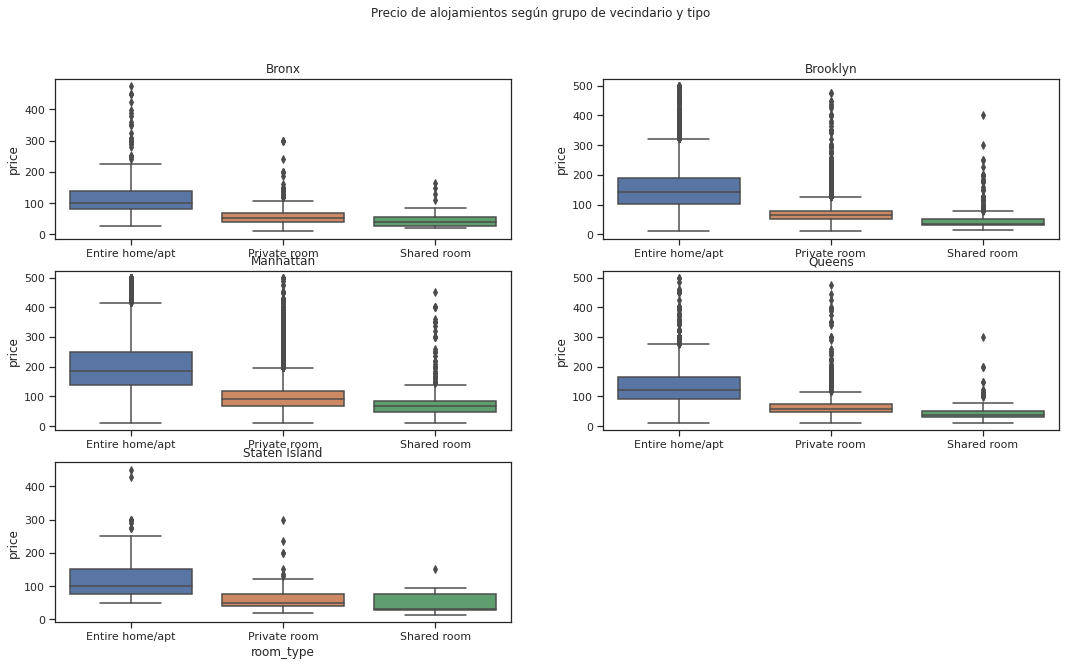

In [25]:
### precio según vecindario y tipo de alojamiento

fig, axes = plt.subplots(3, 2, figsize = (18, 10))

fig.suptitle('Precio de alojamientos según grupo de vecindario y tipo')

sns.boxplot(ax = axes[0, 0], data = df_airbnb[(df_airbnb['neighbourhood_group'] == 'Bronx') & (df_airbnb['price'] < 500)], x = 'room_type', y = 'price')
sns.boxplot(ax = axes[0, 1], data = df_airbnb[(df_airbnb['neighbourhood_group'] == 'Brooklyn') & (df_airbnb['price'] < 500)], x = 'room_type', y = 'price')
sns.boxplot(ax = axes[1, 0], data = df_airbnb[(df_airbnb['neighbourhood_group'] == 'Manhattan') & (df_airbnb['price'] < 500)], x = 'room_type', y = 'price')
sns.boxplot(ax = axes[1, 1], data = df_airbnb[(df_airbnb['neighbourhood_group'] == 'Queens') & (df_airbnb['price'] < 500)], x = 'room_type', y = 'price')
sns.boxplot(ax = axes[2, 0], data = df_airbnb[(df_airbnb['neighbourhood_group'] == 'Staten Island') & (df_airbnb['price'] < 500)], x = 'room_type', y = 'price')
axes[2, 1].axis('off')
axes[0, 0].set_title('Bronx')
axes[0, 1].set_title('Brooklyn')
axes[1, 0].set_title('Manhattan')
axes[1, 1].set_title('Queens')
axes[2, 0].set_title('Staten Island')
axes[0, 0].set_xlabel('')
axes[0, 1].set_xlabel('')
axes[1, 0].set_xlabel('')
axes[1, 1].set_xlabel('')
axes[0, 0].set_xlabel('')

fig.show()

## la diferencia entre los tipos de alojamiento observada en el total se mantiene en cada grupo de vecindario


                     price
neighbourhood_group       
Manhattan            150.0
Brooklyn              90.0
Queens                75.0
Staten Island         75.0
Bronx                 65.0


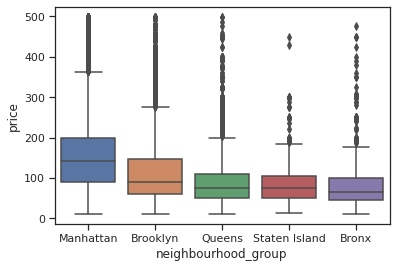

In [33]:
# mediana del precio en cada vecindario
vec_median = df_airbnb[['price', 'neighbourhood_group']].groupby('neighbourhood_group').agg('median').sort_values('price', ascending = False)
print(vec_median)

# precio según vecindario
sns.boxplot(x = df_airbnb['neighbourhood_group'][df_airbnb['price'] < 500],y = df_airbnb['price'][df_airbnb['price'] < 500], order = vec_median.index)
plt.show()

# los precios más altos están en general en Manhattan, le sigue Brooklyn
# los precios en Bronx, Queens y Staten Islands se distribuyen de forma muy similar

In [44]:
# anfitriones según cantidad de alojamientos que poseen
anfit = df_airbnb.groupby('host_id').size()
anfit = pd.DataFrame({'host_id': anfit.index, 'frecuencia': anfit.values}).sort_values('frecuencia', ascending = False)
anfit = pd.merge(anfit, df_airbnb[['host_id', 'host_name']], on = 'host_id', how = 'left')
anfit = anfit.drop_duplicates()
anfit = anfit[['host_id', 'host_name', 'frecuencia']]

# top 10 anfitriones con más alojamientos
print('estos son los 10 anfitriones con más alojamientos y la cantidad que poseen:')
print(anfit.head(10))

print('')

## el anfitrión con más alojamientos posee 327

anfit['grup_frec'] = '1'
mask = anfit['frecuencia'] == 2
anfit.loc[mask, 'grup_frec'] = '2'
mask = anfit['frecuencia'] > 2
anfit.loc[mask, 'grup_frec'] = '3 o más'

anfit2 = anfit.groupby('grup_frec').size()
anfit2 = pd.DataFrame({'grup_anfit': anfit2.index, 'frecuencia': anfit2.values})
anfit2['porcentaje'] = round(100*anfit2['frecuencia']/sum(anfit2['frecuencia']), 2)
print(anfit2)

## el 86% de los anfitriones sólo tiene 1 alojamiento

estos son los 10 anfitriones con más alojamientos y la cantidad que poseen:
        host_id          host_name  frecuencia
0     219517861       Sonder (NYC)         327
327   107434423         Blueground         232
559    30283594               Kara         121
680   137358866             Kazuya         103
783    16098958     Jeremy & Laura          96
879    12243051             Sonder          96
975    61391963  Corporate Housing          91
1066   22541573                Ken          87
1153  200380610            Pranjal          65
1218    7503643               Vida          52

  grup_anfit  frecuencia  porcentaje
0          1       32302       86.24
1          2        3328        8.89
2    3 o más        1825        4.87


count    48884.000000
mean       112.779498
std        131.627271
min          0.000000
25%          0.000000
50%         45.000000
75%        227.000000
max        365.000000
Name: availability_365, dtype: float64

El 35.86% de los alojamientos no tuvo disponibilidad en 2019


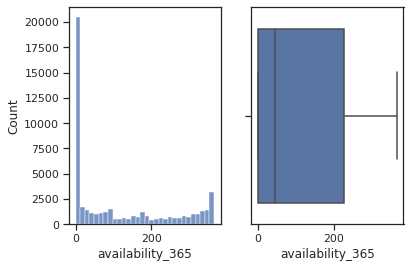

In [73]:
# disponibilidad de los alojamientos: asumo que 'availability_365' representa la cantidad de días que el
# alojamiento estuvo disponible en el año

fig, ax = plt.subplots(1, 2)
# histograma de la disponibilidad en días
sns.histplot(ax = ax[0], x = df_airbnb['availability_365'])
sns.boxplot(ax = ax[1], x = df_airbnb['availability_365'])
fig.show()

# al parecer muchos alojamientos no estuvieron disponibles muchos días en el año

print(df_airbnb['availability_365'].describe())
# el promedio de días disponible es 112, pero más del 25% de los casos no tuvo disponibilidad en todo el año

print()
print(f'El {round(100*sum(df_airbnb["availability_365"] == 0)/len(df_airbnb), 2)}% de los alojamientos no tuvo disponibilidad en 2019')


                     availability_365
neighbourhood_group                  
Staten Island                   219.0
Bronx                           148.0
Queens                           98.0
Manhattan                        36.0
Brooklyn                         28.0


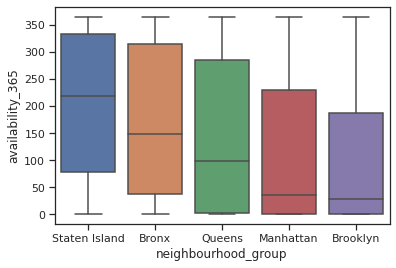

In [76]:
# disponibilidad media según grupo de vecindario
vec_median_avail = df_airbnb[['availability_365', 'neighbourhood_group']].groupby('neighbourhood_group').agg('median').sort_values('availability_365', ascending = False)
print(vec_median_avail)

# grafico disponibilidad según grupo de vecindario
sns.boxplot(x = 'neighbourhood_group', y = 'availability_365', data = df_airbnb, order = vec_median_avail.index)
plt.show()

## los vecindarios con mayor disponibilidad son los de menor precio mediano


In [45]:
# los 100 alojamientos con más reseñas
aloj = df_airbnb[['id', 'name', 'number_of_reviews', 'latitude', 'longitude']].sort_values('number_of_reviews', ascending = False).head(100)
print(aloj)


             id                                           name  \
11759   9145202                        Room near JFK Queen Bed   
2031     903972                     Great Bedroom in Manhattan   
2030     903947                 Beautiful Bedroom in Manhattan   
2015     891117                   Private Bedroom in Manhattan   
13495  10101135                        Room Near JFK Twin Beds   
...         ...                                            ...   
7317    5390882                     Charming Bedroom in Harlem   
22100  17777654  Bright Comfy Quiet Room Just 6 Mins from JFK!   
2111     962045  Private Room & Coffee, only 3 blocks to Train   
116       26969            2 story family home in Williamsburg   
6042    4424511            Great location, cozy, near F, G, R!   

       number_of_reviews  latitude  longitude  
11759                629  40.66730  -73.76831  
2031                 607  40.82085  -73.94025  
2030                 597  40.82124  -73.93838  
2015           

In [46]:
# mapa: distribución territorial de los 100 alojamientos con más reseñas

map = folium.Map()

for i in range(len(aloj)):
    lat = aloj["latitude"].to_list()[i]
    lon = aloj["longitude"].to_list()[i]
    folium.Marker(location=[lat, lon], icon=folium.Icon(color="red", icon="check", prefix="fa")).add_to(map)

map

In [53]:
# guardo data set limpio
df_airbnb.to_csv('../data/processed/datos_limpios_airbnb.csv')